# **The coin Analogy**

 When trying to understand the difference between classical computing and quantum computing, you can use a coin to explain the differences. In classical computing, a throw of a coin can either be head or tail, where at any given time it is either one, similarly how computers are in 0’s and 1’s. For quantum computing, imagine the coin is spinning, where you aren’t certain if it will fall on head or tail, in actual fact it can be both at the same time. In quantum computing, a qubit can have a superposition of both 0 and 1 states simultaneously, we will go over this shortly. However, it’s important to note that the qubit isn’t a mix of the two, but it’s a mix of the probabilities.  

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import StatevectorSimulator


## **Superposition and Qubits**

So, we know a spinning coin is essentially both heads and tails simultaneously. But once the coin is stopped or measured, it can only be head or tail but not both. A qubit in superposition holds a probability amplitude of either $|0\rangle$ or $|1\rangle$ state. Once this coin is measured, it collapses to one of those states based on the probabilities. Mathematically, a qubit's state can be represented as:

$$|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$$

where $\alpha$ and $\beta$ are complex numbers known as probability amplitudes. 

```{admonition} Explanation
:class: tip, dropdown

The equation $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$ represents the state of a qubit. Here, $|\psi\rangle$ is the state of the qubit, and it is written as a combination of the states $|0\rangle$ and $|1\rangle$. The symbols $\alpha$ and $\beta$ are called probability amplitudes, and they tell us how much of the qubit is in the state $|0\rangle$ and how much is in the state $|1\rangle$. These amplitudes can be complex numbers, which means they can have both a real part and an imaginary part.

The probabilities of measuring the qubit in state $|0\rangle$ or $|1\rangle$ are found by squaring the magnitudes of $\alpha$ and $\beta$. The key rule is that the sum of these squared magnitudes must equal 1, ensuring that the total probability of all possible outcomes is 100%. Mathematically, this is expressed as $|\alpha|^2 + |\beta|^2 = 1$. This equation guarantees that we've accounted for all possibilities of the qubit's state.
```

These amplitudes determine the probability of the qubit being measured in either the $|0\rangle$ or $|1\rangle$ state. The key property that must always hold is:

$$|\alpha|^2 + |\beta|^2 = 1$$

This ensures that the total probability of the qubit being in one of the two states is 1. We will discuss this in more detail in a later section of this chapter.

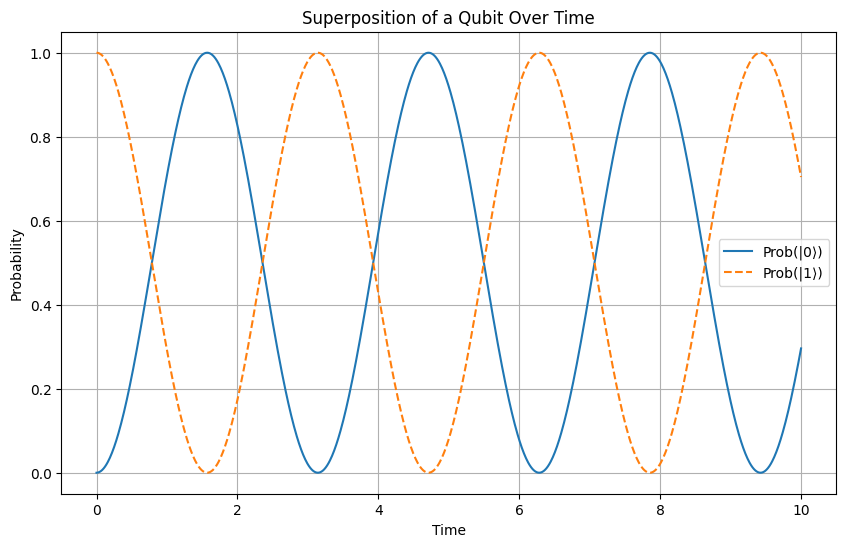

In [9]:
# Generate a time array
t = np.linspace(0, 10, 1000)
alpha = np.sin(t)
beta = np.sqrt(1 - alpha**2)

# Probabilities
prob_0 = alpha**2
prob_1 = beta**2

plt.figure(figsize=(10,6))

# Plotting the probabilities
plt.plot(t, prob_0, label="Prob(|0⟩)")
plt.plot(t, prob_1, label="Prob(|1⟩)", linestyle='--')

plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Superposition of a Qubit Over Time')
plt.legend()
plt.grid(True)
plt.show()

## **Entanglement**

Let’s now take two spinning coins on separate tables, imagine they are “linked” (entangled). If you were to check the superposition of one coin, you will instantly know the outcome of the other coin without checking. This means that if you check the superposition of coin one and find it to be head, you now know coin two is tail. When these qubits become entangled, the state of one qubit is interdependent with the state of one another.

This entanglement tells us that in the quantum world there is such a thing as non-locality; there is an instantaneous connection between the coins no matter how far apart they are. Einstein famously referred to this phenomenon as 'spooky action at a distance'. He was troubled by the idea of instantaneous connections between entangled particles, which he considered a profound and puzzling aspect of quantum physics. The state of entangled qubits can be represented as:

$$|\psi\rangle = \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle + \delta |11\rangle$$

where $\alpha, \beta, \gamma,$ and $\delta$ are complex numbers and the sum of their squared magnitudes equals 1:

$$|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1$$

```{admonition} Explanation
:class: tip, dropdown
This equation shows that the state of two entangled qubits ($|\psi\rangle$) can be a combination of four possible states: $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$. Each state has a probability amplitude ($\alpha, \beta, \gamma, \delta$) which are complex numbers. 

In simpler terms, think of each state ($|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$) as different outcomes that the system of two qubits can have. The coefficients ($\alpha, \beta, \gamma, \delta$) in front of each state tell us how likely each outcome is. These coefficients are not just any numbers; they are complex numbers, which means they have both a real part and an imaginary part.

The sum of the probabilities of all these states must be 1. This is a crucial rule in quantum mechanics that ensures the total probability of all possible outcomes is always 100%. Mathematically, this is written as $|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1$, where $|\alpha|^2$ means the square of the magnitude of $\alpha$, and similarly for the other coefficients. This equation ensures that we have accounted for all possible outcomes.
```

This ensures that the total probability of all possible states is 1. For example, in a simple entangled state like:

$$|\psi\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle$$

```{admonition} Explanation
:class: tip, dropdown
In this example, the state of the two qubits is equally likely to be $|00\rangle$ or $|11\rangle$. The coefficients $\frac{1}{\sqrt{2}}$ are chosen such that the probabilities of these states add up to 1.

Here, we simplify things by considering a special case of entanglement where only two outcomes are possible: both qubits are in the state $|00\rangle$ (both qubits are 0) or both are in the state $|11\rangle$ (both qubits are 1). The coefficients $\frac{1}{\sqrt{2}}$ are chosen because when we square them and add them up, they equal 1, fulfilling the probability rule we mentioned earlier.

Specifically, $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$. So, if we have $\frac{1}{\sqrt{2}}$ for both $|00\rangle$ and $|11\rangle$, their probabilities are both $\frac{1}{2}$, and $\frac{1}{2} + \frac{1}{2} = 1$. This means there's a 50% chance of getting $|00\rangle$ and a 50% chance of getting $|11\rangle$ when you measure the system.
```

This means $\alpha = \frac{1}{\sqrt{2}}$ and $\delta = \frac{1}{\sqrt{2}}$, with $\beta = 0$ and $\gamma = 0$. The probabilities of measuring each state are:

$$P(00) = |\alpha|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

$$P(11) = |\delta|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

```{admonition} Explanation
:class: tip, dropdown
Here, we calculate the probabilities of the qubits being in states $|00\rangle$ and $|11\rangle$. Since $\alpha$ and $\delta$ are both $\frac{1}{\sqrt{2}}$, the probabilities are $\left(\frac{1}{\sqrt{2}}\right)^2 = \frac{1}{2}$, meaning there is an equal chance (50%) for the qubits to be in either of these states.

Let's break this down further. We have the state $|\psi\rangle = \frac{1}{\sqrt{2}} |00\rangle + \frac{1}{\sqrt{2}} |11\rangle$. To find out the probability of measuring the system in the state $|00\rangle$, we take the coefficient in front of $|00\rangle$, which is $\frac{1}{\sqrt{2}}$, and square its magnitude. The magnitude of $\frac{1}{\sqrt{2}}$ is just $\frac{1}{\sqrt{2}}$ because it's a positive real number.

So, the probability $P(00)$ is:

$$P(00) = |\alpha|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

Similarly, for the state $|11\rangle$, we take the coefficient in front of $|11\rangle$, which is also $\frac{1}{\sqrt{2}}$, and do the same calculation:

$$P(11) = |\delta|^2 = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$$

So, there is a 50% chance of finding the system in the state $|00\rangle$ and a 50% chance of finding it in the state $|11\rangle$ when you measure it.

```

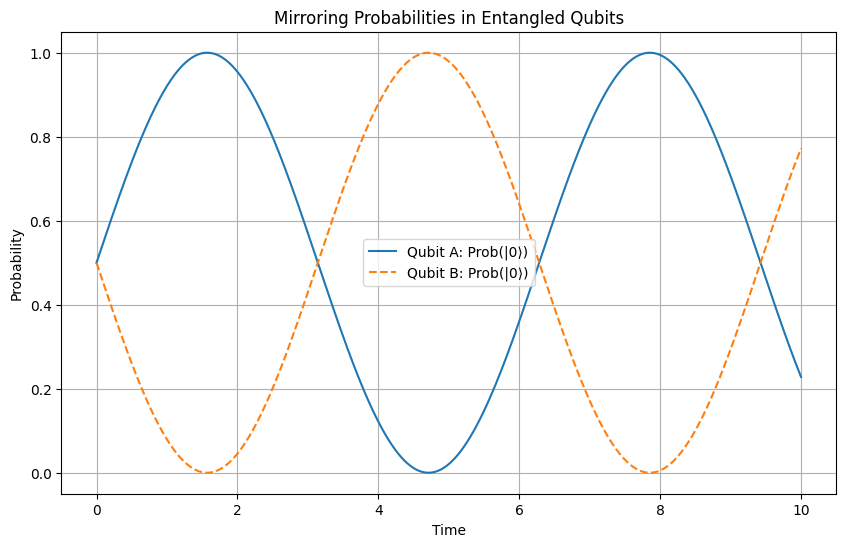

In [25]:
t = np.linspace(0, 10, 1000)
prob_0_A = 0.5 * (1 + np.sin(t))
prob_0_B = 1 - prob_0_A

plt.figure(figsize=(10,6))
plt.plot(t, prob_0_A, label="Qubit A: Prob(|0⟩)")
plt.plot(t, prob_0_B, label="Qubit B: Prob(|0⟩)", linestyle='--')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Mirroring Probabilities in Entangled Qubits')
plt.legend()
plt.grid(True)
plt.show()

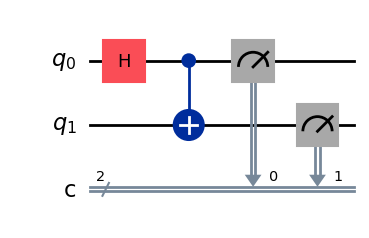

In [14]:
circ = QuantumCircuit(2, 2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0,1], [0,1])
circ.draw('mpl')

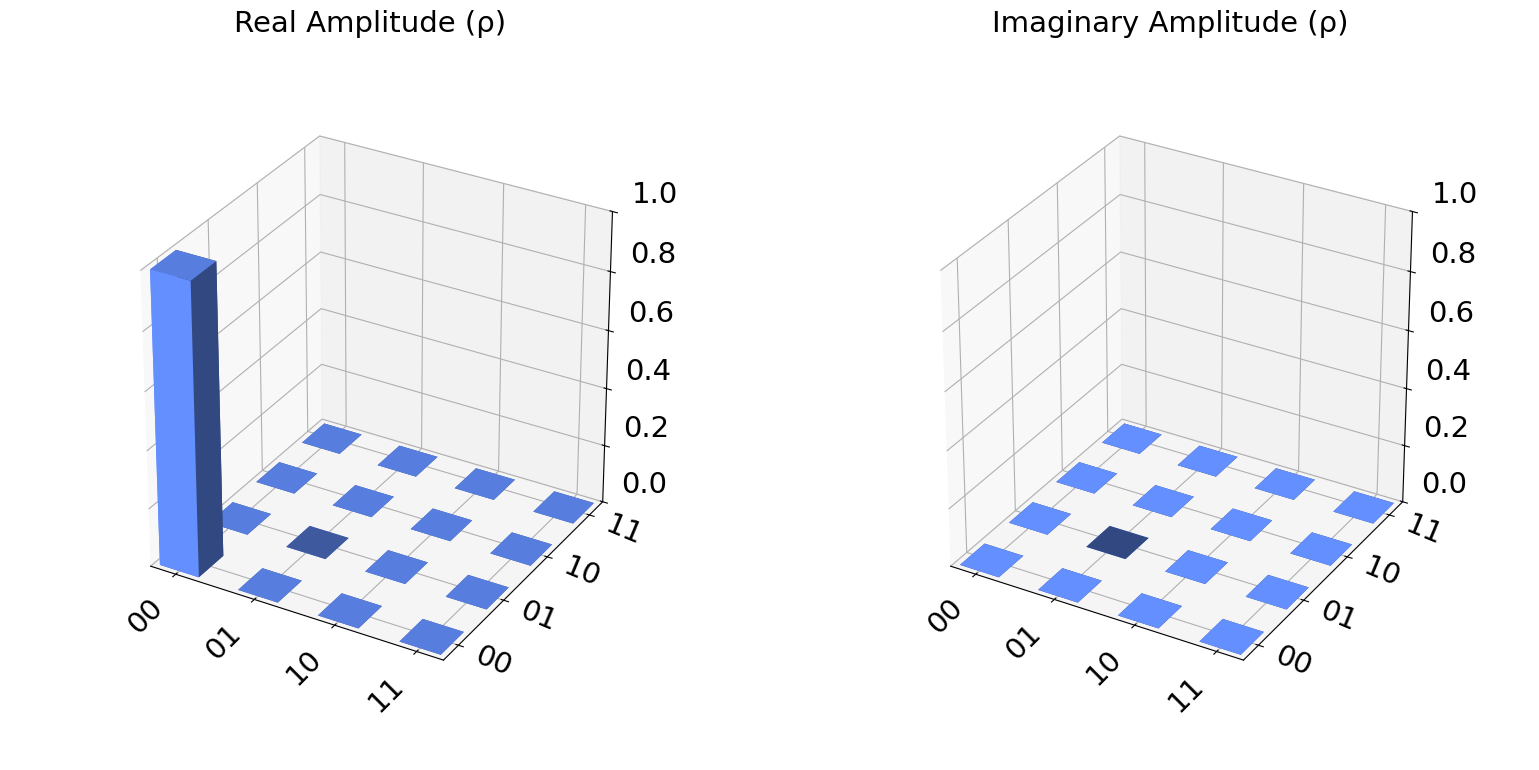

In [24]:
state_simulator = StatevectorSimulator()
compiled_circ = transpile(circ, state_simulator)
statevector = state_simulator.run(compiled_circ).result().get_statevector()
plot_state_city(statevector)

## **Interference**

Imagine there are many paths a spinning coin could take that would influence whether it would land on head or tail. Interference is reinforcing some of those paths to influence the outcome (think guard rails when at a bowling alley). In quantum mechanics, interference happens because of the wave-like nature of particles. 

When qubits are in superposition, their probability amplitudes can interfere with each other. If the amplitudes add up, they create constructive interference, increasing the probability of a certain outcome. If they cancel each other out, they create destructive interference, reducing the probability of a certain outcome.

Mathematically, this can be seen in the calculation of probability amplitudes. For instance, if two possible paths to a state $|\psi\rangle$ have amplitudes $\alpha_1$ and $\alpha_2$, the total amplitude for the state is:

$$\alpha_{\text{total}} = \alpha_1 + \alpha_2$$

The probability of the state is then:

$$P(\psi) = |\alpha_{\text{total}}|^2 = |\alpha_1 + \alpha_2|^2$$

```{admonition} Explanation
:class: tip, dropdown

Interference in quantum mechanics can be thought of similarly to how waves on a pond interact. When two waves meet, they can either add up to create a larger wave (constructive interference) or cancel each other out to create a smaller wave or no wave at all (destructive interference).

In the context of qubits, each path a qubit can take to reach a certain state can be represented by a probability amplitude (like $\alpha_1$ and $\alpha_2$). These amplitudes are complex numbers, which means they have both a magnitude and a phase (a kind of direction). When you add these amplitudes together, their magnitudes and phases determine the resulting total amplitude.

If the amplitudes are in phase (meaning their phases align), they add up constructively, resulting in a larger total amplitude. If they are out of phase (meaning their phases are opposite), they interfere destructively, reducing or canceling out the total amplitude. The probability of the qubit being in a certain state is found by taking the magnitude of the total amplitude and squaring it.
```

Constructive interference occurs when $\alpha_1$ and $\alpha_2$ are in phase and add up to a larger amplitude, while destructive interference occurs when they are out of phase and partially or completely cancel each other out.

For example, if $\alpha_1 = \frac{1}{\sqrt{2}}$ and $\alpha_2 = \frac{1}{\sqrt{2}}$, the total amplitude is:

$$\alpha_{\text{total}} = \frac{1}{\sqrt{2}} + \frac{1}{\sqrt{2}} = \sqrt{2}$$

The probability is:

$$P(\psi) = |\sqrt{2}|^2 = 2$$

```{admonition} Explanation
:class: tip, dropdown

In this example, both amplitudes $\alpha_1$ and $\alpha_2$ are $\frac{1}{\sqrt{2}}$. When added together, since they are in phase, they constructively interfere and sum up to $\sqrt{2}$. To find the probability, we square the magnitude of the total amplitude, which in this case is:

$$|\sqrt{2}|^2 = 2$$

This result shows that the constructive interference has increased the probability compared to each individual amplitude.
```

On the other hand, if $\alpha_1 = \frac{1}{\sqrt{2}}$ and $\alpha_2 = -\frac{1}{\sqrt{2}}$, the total amplitude is:

$$\alpha_{\text{total}} = \frac{1}{\sqrt{2}} - \frac{1}{\sqrt{2}} = 0$$

The probability is:

$$P(\psi) = |0|^2 = 0$$

```{admonition} Explanation
:class: tip, dropdown

In this second example, the amplitudes $\alpha_1$ and $\alpha_2$ are $\frac{1}{\sqrt{2}}$ and $-\frac{1}{\sqrt{2}}$ respectively. Since they are out of phase (one is positive and the other is negative), they destructively interfere and cancel each other out, resulting in a total amplitude of 0. The probability is then:

$$|0|^2 = 0$$

This means there is no chance of the qubit being in the state described by these amplitudes, demonstrating how destructive interference can eliminate certain outcomes.
```

This shows how quantum interference can dramatically change the probabilities of different outcomes.

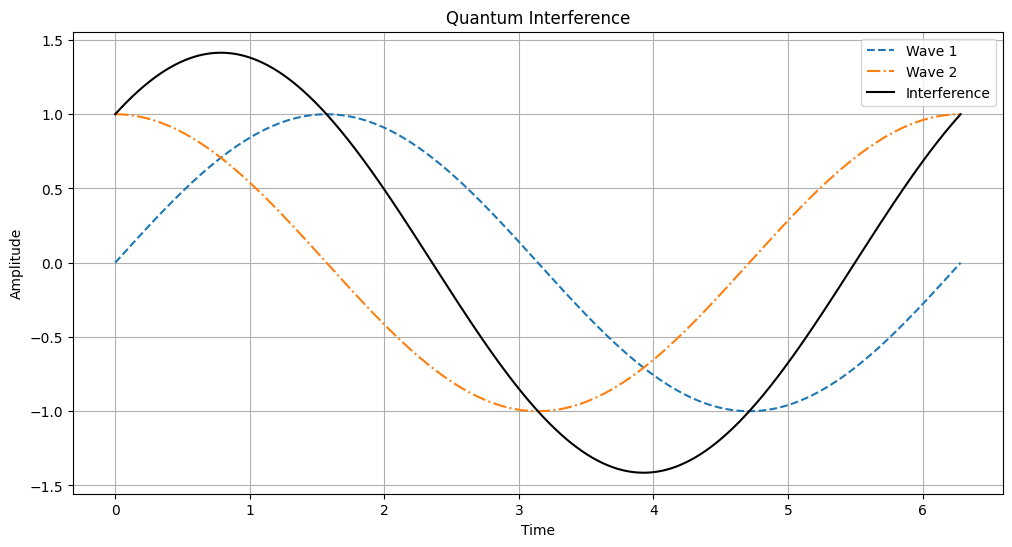

In [26]:
t = np.linspace(0, 2 * np.pi, 1000)

wave1 = np.sin(t)
wave2 = np.sin(t + np.pi/2)
interference_pattern = wave1 + wave2

plt.figure(figsize=(12,6))

plt.plot(t, wave1, label="Wave 1", linestyle='--')
plt.plot(t, wave2, label="Wave 2", linestyle='-.')
plt.plot(t, interference_pattern, label="Interference", color='black', linewidth=1.5)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Quantum Interference')
plt.legend()
plt.grid(True)
plt.show()